In [1]:
from pysheds.grid import Grid

In [2]:
#grid = Grid.from_raster('ondemand/SWOT_discharge/data/outputs/ohio_dem.tif')
#dem = grid.read_raster('ondemand/SWOT_discharge/data/outputs/ohio_dem.tif')

grid = Grid.from_raster('/home/rajani/Downloads/ohio_dem.tiff')
dem = grid.read_raster('/home/rajani/Downloads/ohio_dem.tiff')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

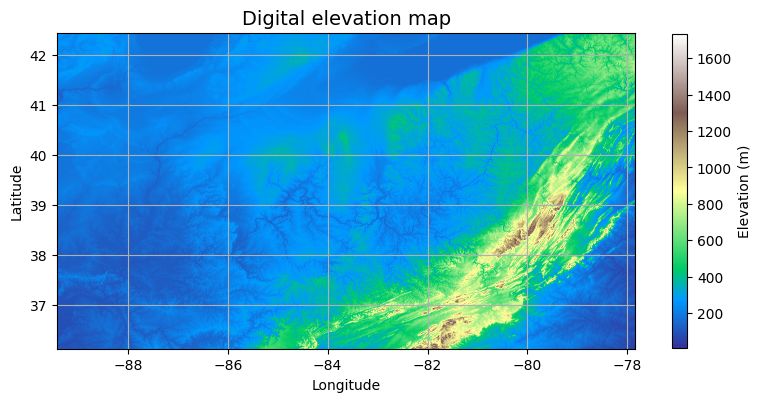

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)', shrink=0.55)
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [5]:
print(dem.min(), dem.max())

12.4831085 1732.1719


In [6]:
# Condition DEM
# ----------------------
# Fill pits in DEM
pit_filled_dem = grid.fill_pits(dem)
print(pit_filled_dem.min(), pit_filled_dem.max())

13.28230094909668 1732.171875


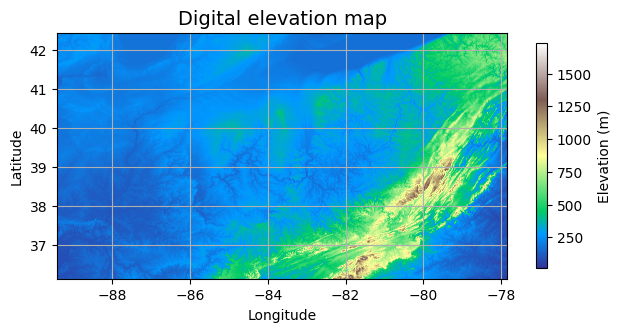

In [7]:
plt.imshow(pit_filled_dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)', shrink=0.5)
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [8]:
# Fill depressions in DEM
flooded_dem = grid.fill_depressions(pit_filled_dem)

In [9]:
print(flooded_dem.min(), flooded_dem.max())

35.552650451660156 1732.171875


In [10]:
# Resolve flats in DEM
inflated_dem = grid.resolve_flats(flooded_dem)
print(inflated_dem.min(), inflated_dem.max())

35.552670451660155 1732.171875


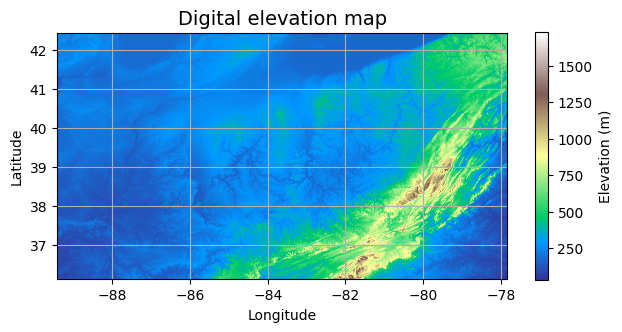

In [11]:
plt.imshow(inflated_dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)', shrink=0.55)
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [12]:
# Determine D8 flow directions from DEM
# ----------------------
# Specify directional mapping
dirmap = (64, 128, 1, 2, 4, 8, 16, 32)
    
# Compute flow directions
# -------------------------------------
fdir = grid.flowdir(inflated_dem, dirmap=dirmap)

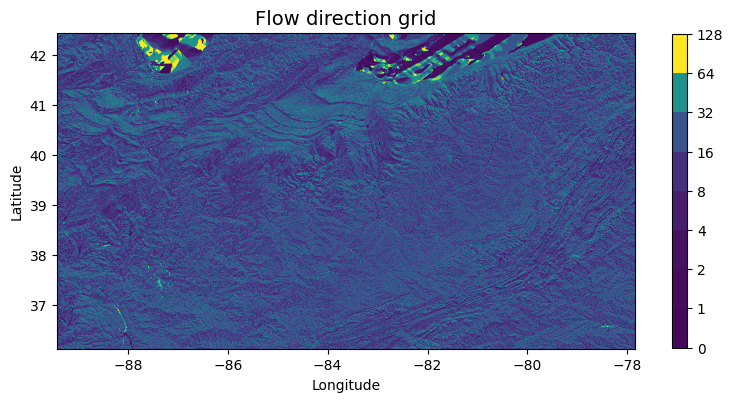

In [13]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(fdir, extent=grid.extent, cmap='viridis', zorder=2)
boundaries = ([0] + sorted(list(dirmap)))
plt.colorbar(boundaries= boundaries,
             values=sorted(dirmap), shrink=0.55)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flow direction grid', size=14)
plt.grid(zorder=-1)
plt.tight_layout()

In [14]:
# Calculate flow accumulation
# --------------------------
acc = grid.accumulation(fdir, dirmap=dirmap)


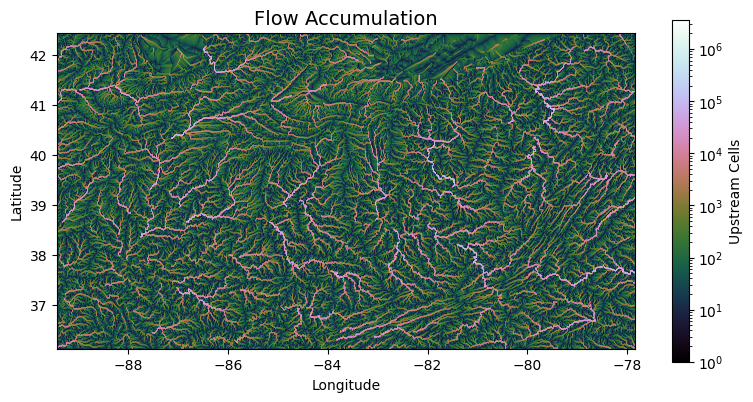

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
im = ax.imshow(acc, extent=grid.extent, zorder=2,
               cmap='cubehelix',
               norm=colors.LogNorm(1, acc.max()),
               interpolation='bilinear')
plt.colorbar(im, ax=ax, label='Upstream Cells', shrink=0.60)
plt.title('Flow Accumulation', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [16]:
# Extract river network
# ---------------------
branches = grid.extract_river_network(fdir, acc > 10000, dirmap=dirmap)

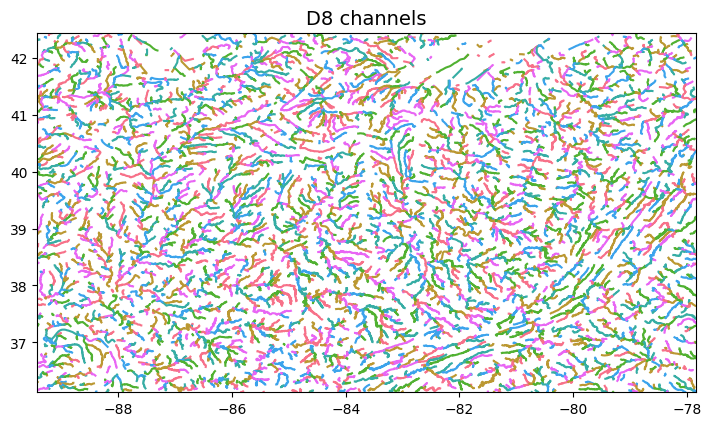

In [17]:
sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
ax.set_aspect('equal')

for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])
    
_ = plt.title('D8 channels', size=14)

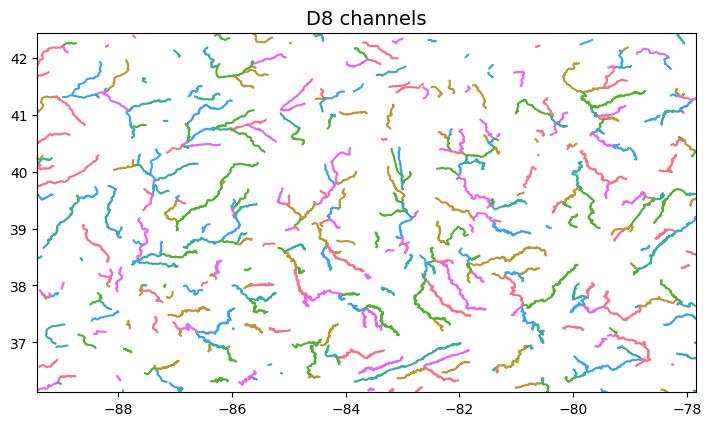

In [18]:
branches = grid.extract_river_network(fdir, acc > 100000, dirmap=dirmap, apply_output_mask=False)

sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
ax.set_aspect('equal')

for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])
    
_ = plt.title('D8 channels', size=14)

In [24]:
branches_50000 = grid.extract_river_network(fdir, acc > 50000)
branches_20000 = grid.extract_river_network(fdir, acc > 20000)

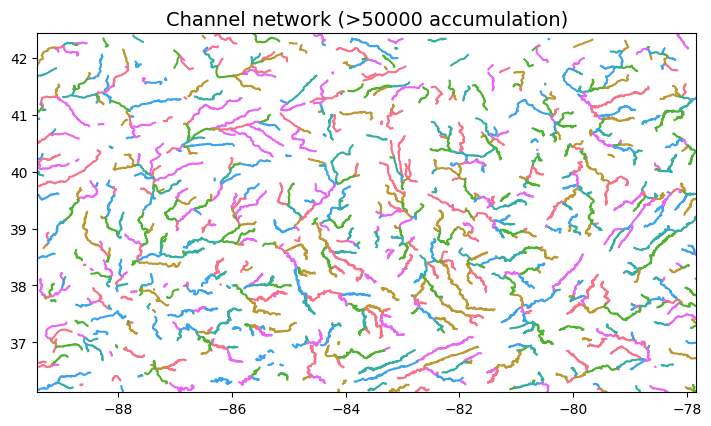

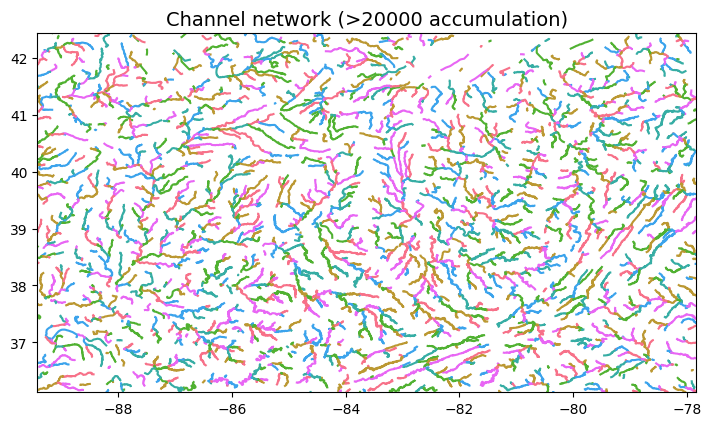

In [25]:
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
ax.set_aspect('equal')

for branch in branches_50000['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])
    
_ = plt.title('Channel network (>50000 accumulation)', size=14)

sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
ax.set_aspect('equal')

for branch in branches_20000['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])
    
_ = plt.title('Channel network (>20000 accumulation)', size=14)